In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
def loss_fn(X, Y, beta):
    return cp.norm2(X @ beta - Y)**2

def regularizer(beta):
    return cp.norm1(beta)

def objective_fn(X, Y, beta, lambd):
    return loss_fn(X, Y, beta) + lambd * regularizer(beta)

def mse(X, Y, beta):
    return (1.0 / X.shape[0]) * loss_fn(X, Y, beta).value

In [3]:
np.random.seed(69)
m = 30
n = 100
A = np.random.randn(m,n)
epsilon = np.random.normal(0,0.5,size = (m,))
X = bernoulli.rvs(0.2,0.8,size = n)
y = np.matmul(A,X) + epsilon

In [10]:
errors = []
beta_values = []
beta = cp.Variable(n)
lambd = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(objective_fn(X, y, beta, lambd)))
lambd_values = [1,10,100,200,500,1000]
for v in lambd_values:
    lambd.value = v
    problem.solve()
    errors.append(mse(X, y, beta))
    beta_values.append(beta.value)


In [11]:
errors

[3.1493503373773066,
 3.157600800072811,
 3.196679887820699,
 3.1966798880709466,
 3.1966798877170532,
 3.1966798880805993]

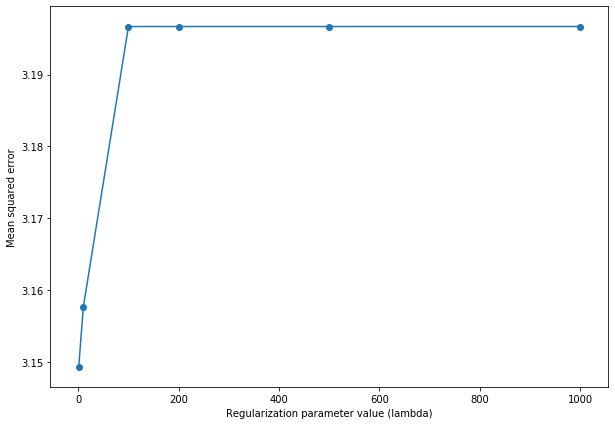

In [12]:
plt.figure(figsize = (10,7))
plt.plot(lambd_values,errors)
plt.xlabel("Regularization parameter value (lambda)")
plt.ylabel("Mean squared error")
plt.scatter(lambd_values,errors)
plt.show()

As we can see the, the errors increase as the magnitude of lambda values(regularization parameter) increases, but, it has an upper bound at 3.196 for this problem.
Hence, the regularization parameter, regularizes the sparse coeffiecient matrix and reduces the mean squared error.